# Labyblocks

---

**Génération, résolution et visualisation de labyrinthes avec ipythonblocks**

## PART I. Découverte de ipythonblocks

### Installation

Comme la plupart des modules python, si votre installation est correcte, vous devriez pouvoir installer le module par un simple :

```bash
pip install ipythonblocks
```

Si vous souhaitez plus d'informations sur ce qu'est ce module, rendez-vous sur leur page web : [ipythonblocks.org](http://www.ipythonblocks.org/). 

### Premières grilles

L'objet de base est `BlockGrid` : une grille de _blocs carrés_ en lignes et colonnes. Exécuter la cellule suivante pour importer l'objet `BlockGrid` du module.

In [1]:
from ipythonblocks import BlockGrid

La création d'une grille se fait par création d'un objet `BlockGrid`, en précisant la largeur et la hauteur de la grille créée :

In [2]:
BlockGrid(6, 4)

Il vaut mieux créer une référence vers notre objet grille :

In [3]:
ma_grille = BlockGrid(8, 3)

Et utiliser la méthode `show` pour la visualiser :

In [4]:
ma_grille.show()

#### Une case de la grille

Si on passe un indice de ligne et un indice de colonne entre crochets, on accède à une case de la grille ; qui est affichée comme sortie.

In [5]:
ma_grille[0, 4]

Block(0, 0, 0, size=20)

On peut ainsi changer la couleur d'une case. Les couleurs dans ipythonblocks sont des triplets de valeurs entières entre 0 et 255. Une pour chaque composante rouge, vert et bleu. 

In [6]:
ma_grille[0, 4] = (255, 0, 0)

In [7]:
ma_grille.show()

#### Valeurs par défaut

À la création de la grille, il faut préciser les dimensions (dans l'ordre largeur puis hauteur) mais on peut aussi préciser d'autres paramètres :

- la taille d'une case : `block_size` dont la valeur par défaut est 20
- la couleur de remplissage : `fill` dont la valeur par défaut est (0, 0, 0) 
- les lignes séparatrices blanches : `lines_on` valant `True` par défaut

In [8]:
small_size = BlockGrid(10, 10, block_size=8)

In [9]:
small_size.show()

In [10]:
purple = BlockGrid(12, 5, fill=(196, 121, 211))

In [11]:
purple.show()

In [12]:
rectangle = BlockGrid(7, 10, lines_on=False)

In [13]:
rectangle.show()

#### Un objet avec des propriétés

L'objet `BlockGrid` possède des propriétés que l'on peut manipuler, voir modifier pour certaines :

In [14]:
G = BlockGrid(10, 6)

In [15]:
G.show()

In [16]:
G.width

10

In [17]:
G.height

6

In [18]:
G.block_size

20

In [19]:
G.block_size = 8

In [20]:
G.show()

In [21]:
G.lines_on

True

In [22]:
G.lines_on = False

In [23]:
G.show()

In [24]:
G.lines_on = True

In [25]:
G.block_size = 20

Les cases sont aussi des objets :

In [26]:
upper_left = G[0, 0]

Avec des propriétés :

In [27]:
upper_left.red

0

In [28]:
upper_left.red = 156

In [29]:
G.show()

In [30]:
upper_left.gren = 87
upper_left.blue = 128

In [31]:
upper_left.show()

In [32]:
upper_left.size

20

### Manipuler les `BlockGrid`

Créer plusieurs objets `BlockGrid` avec différentes tailles, couleurs etc. Vous trouverez des exemples sympas sur cette page : [ipythonblocks exemples](https://nbviewer.org/github/jiffyclub/ipythonblocks/blob/master/demos/ipythonblocks_fun.ipynb)

## PART II. Labyrinthe : génération

Nous allons créer des labyrinthes de ce type :

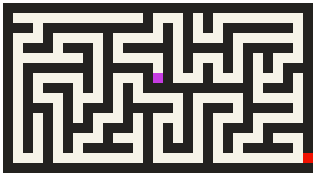

### Le modèle

Le labyrinthe est caractérisé par :
- des dimensions (une largeur et une hauteur)
- une collection de cellules ; chaque cellule possède des coordonnées en ligne et colonne et un état ie une valeur entière qui renseigne sur la nature de la cellule : sur l'exemple ci-dessus on constate qu'il y a des murs (en gris foncé) et des couloirs (en beige) ; on note aussi une cellule _mauve_ et une autre _rouge_. Il s'agit respectivement du point de départ et de la sortie du labyrinthe.

### Le vue

Le labyrinthe doit aussi pouvoir s'afficher ce sera le rôle de la vue : un objet `BlockGrid` dont les cellules seront colorisées correctement en fonction de la nature de la cellule au même emplacement.

### La classe `Cell`

Définir une classe `Cell` qui possède les propriétés suivantes :
- `x` et `y`, les coordonnées de la cellule
- `state` un état
- `laby` une référence vers le labyrinthe auquel la cellule appartient
- `visited` un booléen initialisé à `False` dont nous aurons besoin plus tard

Une instance de cellule ne sera créée que via un objet _labyrinthe_. Pour l'instant les états possibles des cellules sont :

```python
PATH = 0
WALL = 1
START = 3
END = 4
```

In [ ]:
# Votre class Cell ici

### La classe `Laby`

Nous allons définir une classe `Laby` qui possède :
- `width` et `height` : les dimensions du labyrinthe qui seront respectivement le nombre de colonnes et de lignes ; 
- `start` les coordonnées du point de départ qui se trouvera toukjours au centre du labyrinthe
- `end` les coordonnées de la sortie qui se situera dans le bas à droite
- `cells` un dictionnaire dont les clés sont des coordonnées $(x, y)$ et les valeurs associées des `Cell` ; pour le moment toutes avec le statut de `WALL`
- `blocks`  un objet `BlockGrid` de la bonne dimension (on pourra masquer les lignes)

### Précision sur les dimensions

La construction de notre labyrinthe se fera en 3 étapes :

1. au constructeur on passe deux entiers $w$ et $h$ qui crée alors une grille de largeur $2w + 1$ et $2h + 1$ dont toutes les cellules sont des murs ; par exemple pour $w = 7$ et $h = 4$ voici ce qu'on obtient :

   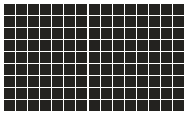

2. on transforme en partie libre (`PATH`) 1 cellule sur 2 ; on a alors 7 cellules vide en largeur et 4 en hauteur (on a supprimé les séparations entre les cellules) ; on en profite pour placer entrée et sortie :

   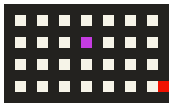

3. on génère le layrinthe (on reviendra sur la méthode dans le prochain chapitre) :

   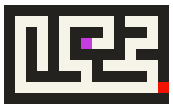

### Étape 1

Définir la classe `Laby`, y ajouter une méthode `show`  et faire en sorte de pouvoir réaliser l'étape 1 :

```ipython
[1]: test = Laby(7, 4, line=True)
[2]: test.show()
```

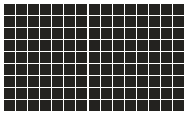

### Étape 2

Pour réaliser cette étape, nous devons _ouvrir_ certains murs ; plus exactement 1 sur 2 en partant du mur en $(1, 1)$.

- Ajouter une méthode `open` à la classe `Cell` qui change l'état de la cellule en `PATH` ; un argument booléen devra pouvoir être passé pour changer la valeur de la propriété `visited`
- Définir dans la classe `Laby` une méthode `init_laby` qui _ouvre_ 1 cellule sur 2 et invoquer cette méthode à la fin de l'initialiseur en prenant bien sooin de laisser `visited` à `False` ; de sorte que :

```ipython
[1]: test = Laby(7, 4)
[2]: test.show()
``` 

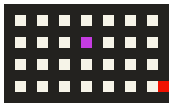

### Étape 3

Voici le principe de construction :

1. on part de la case `START` qu'on mémorise dans une pile (on utilisera une simple liste Python avec les méthodes `append` et `pop`)
2. tant que la pile n'est pas vide :
    - on marque la cellule courante (celle en haut de la pile) comme visitée
    - on calcule toutes les directions dans lesquelles à partir de la cellule courante on peut éventuellement ouvrir un mur c'est-à-dire telle que derrière ce mur se trouve une cellule non encore visitée
    - s'il n'y en a aucune, on dépile cette cellule
    - sinon on choisit une direction au hasard, on ouvre le mur adjacent dans cette direction (en marquant la cellule ainsi créée comme visitée) et on empile la cellule vide adjacente au mur dans la même direction

#### Construction en images

Au départ, la cellule courante est celle du centre, en mauve : 

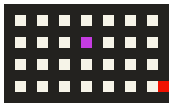

Les 3 cellules vides sont non visitées (les cellules visitées sont en vert), on choisit au hasard d'aller vers l'est:

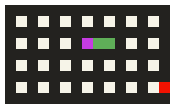

Puis encore 1 fois vers l'est, le nord, l'ouest 4 fois, le sud, l'ouest, le nord et on est sur une première impasse :

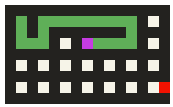

On dépile donc cette cellule, et on est donc sur la cellule qui permet de continuer vers le sud :

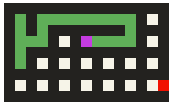

On continue et on tombe sur une deuxième impasse :

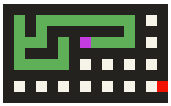

On dépile et on explore une autre direction depuis la dernière cellule où c'est possible et ainsi de suite jusqu'à avoir complété le labyrinthe :

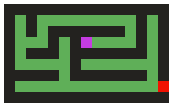

Définir la méthode `generate` qui réalise l'étape 3 de la construction du labyrinthe ; on devra donc pouvoir faire :

```ipython
[1]: test = Laby(30, 10, size=5)
[2]: test.generate()
```

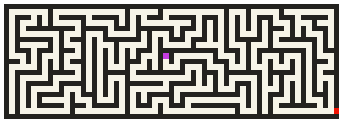

## PART III. La résolution

Maintenant que votre labyrinthe est construit, il faut le résoudre c'est-à-dire trouver le chemin de l'entrée jusqu'à la sortie. La résolution suit le même principe que la construction à ceci près : si la sortie fait partie des cellules voisines, alors elle sera choisit plutôt qu'une cellule au hasard.

Faites en sorte qu'apparaissent les chemins testés qui ont conduit à une impasse :

```ipython
[1]: laby30x10 = Laby(30, 10, size=5)
[2]: laby30x10.generate()
```

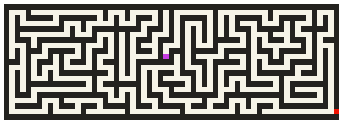

```ipython
[3]: laby30x10.path()
```

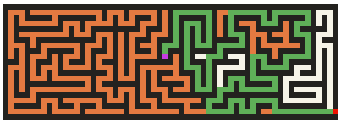

### Extensions

- On pourra ajouter la possibilité d'enregistrer dans un fichier texte un labyrinthe généré et de charger un labyrinthe depuis un tel fichier texte.

- Sur des gros labyrinthes, l'affichage dans un notebook via ipythonblocks présente des limites (l'affichage peut se bloquer). On pourra réfléchir à basculer vers une interface graphique de type pygame et intégrer la possibilité de faire résoudre le labyrinthe par le joueur humain qui se déplacera à l'aide des touches fléchées par exemple.